## Defining the question

### Specifying the question

Creating a model that can classify passengers aboard the titanic as either survivors or casualties. 

### Defining the metrics of success



> To term my project successful, I should have been able to perform EDA on the data and an appropriate model built for predicting whether a passenger survives the titanic shipwreck or doesn't.



### Understanding the context



> The data details the information of passengers aboard the titanic when it sank. The raw train data contains 12 columns and 891 rows. The train and test sets can be found here.[train](https://archive.org/download/train5_202002/train%20%285%29.csv), [test](https://archive.org/download/test1_202002/test%20%281%29.csv)


> The following are the descriptions of the columns in the dataset:
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)








## Reading the data

Importing relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, neighbors, model_selection


Loading of our data:

In [2]:
train =pd.read_csv("/content/train (5).csv")
test  =pd.read_csv("/content/test (1).csv")

Setting parameters for my visualizations

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 700
sns.set_style('darkgrid')

## Checking our data

In [4]:
# checking the columns and rows of the dataframe

print('The training dataframe has a total of', train.shape[0],'rows and', train.shape[1],'columns.')
print('~'*100,'\n')
print('The testing dataframe has a total of', test.shape[0],'rows and', test.shape[1],'columns.')

The training dataframe has a total of 891 rows and 12 columns.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

The testing dataframe has a total of 418 rows and 11 columns.


- The training data has one more column than the test.

In [5]:
# displaying the data types of the column in the two datasets
print(train.info())
print('~'*100,'\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Coun

- The column not found in the test data is the survived column, our target variable.

In [6]:
# previewing the head of the train data

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# previewing the head of the test data

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# previewing the bottom 5 rows in the training dataframe

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# previewing the bottom 5 rows in the testing dataframe

test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Data cleaning

In [10]:
# dropping unnecessary columns
# the column Name and passengerid is to be dropped as it will not be useful during analysis.
# I do not wish to use discrete data with a number of unique values in my analysis.

train.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [11]:
# checking for duplicates and missing values

def misdup(data):

  print("There are duplicates in our dataset. This statement is:",data.duplicated().any())
  print("There are null values in our dataset. This statement is: ",data.isnull().any().any())


print(misdup(train))
print('~'*100)
print(misdup(test))

There are duplicates in our dataset. This statement is: True
There are null values in our dataset. This statement is:  True
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are duplicates in our dataset. This statement is: True
There are null values in our dataset. This statement is:  True
None


In [12]:
# eliminating duplicates

train.drop_duplicates(inplace=True)
train.drop_duplicates(inplace=True)

In [13]:
# computing the number of missing values in the dataframe

print(train.isnull().sum())
print('~'*100,'\n')
print(test.isnull().sum())
  

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [14]:
# filling the null values in the embarked column with the mode

emode = train['Embarked'].mode()

train['Embarked'].fillna(emode[0], inplace=True, axis=0)

In [15]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
# defining a function to fill the null values in ages column

def mean_mode_med(data):

# computes the mean, mode and median of the column
  mn = data['Age'].mean()
  md = data['Age'].median()
  mo = data['Age'].mode()

# calculates the average of the three
  av = (mn+md+mo) /3

  return av


# obtaining the outputs
train_filler = mean_mode_med(train)
test_filler = mean_mode_med(test)

In [17]:
# filling the null values
train['Age'].fillna(train_filler[0], inplace=True)
test['Age'].fillna(test_filler[1], inplace=True)

In [18]:
# confirming abscence of null values
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
train.shape

(780, 8)

## Exploratory Data Analysis

The EDA will only be performed on the training dataset

### Univariate analysis

Text(0.5, 1.0, 'Plot of survivors and non-survivors')

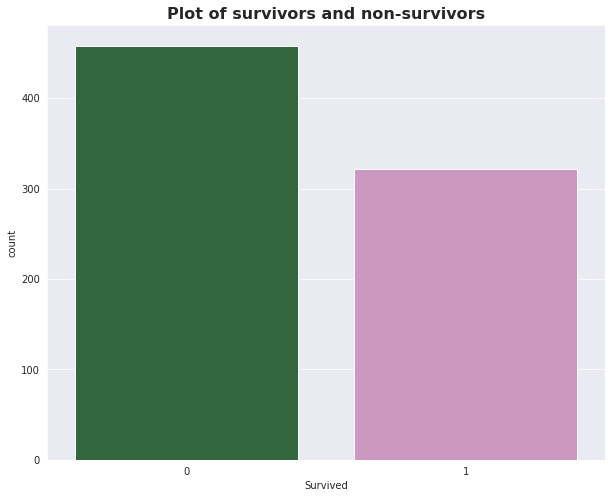

In [20]:
# plotting the numbers of survivors and casualties
sns.countplot(x=train['Survived'], palette='cubehelix')
plt.title("Plot of survivors and non-survivors")

- There were more casualties than survivors. The margin between the two categories is not very large.

Text(0.5, 1.0, 'Number of people embarked from each location')

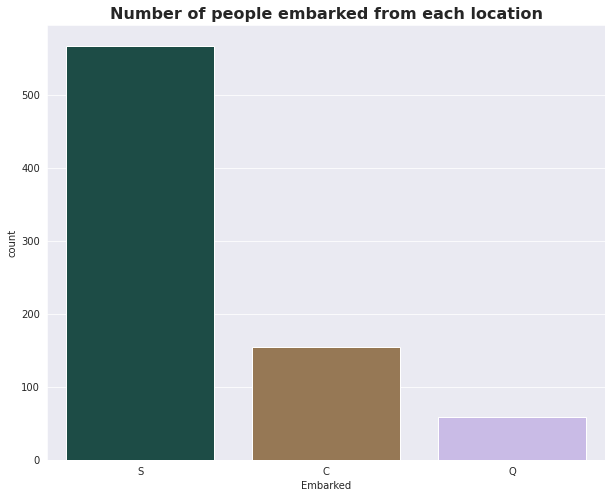

In [21]:
# plotting the number of people who embarked from the three ports
sns.countplot(x=train['Embarked'], palette='cubehelix')
plt.title('Number of people embarked from each location')

- Most of the passengers began their journey at southhampton and the least began from the port of Queenstown.

Text(0.5, 1.0, 'Number of passengers in the different classes')

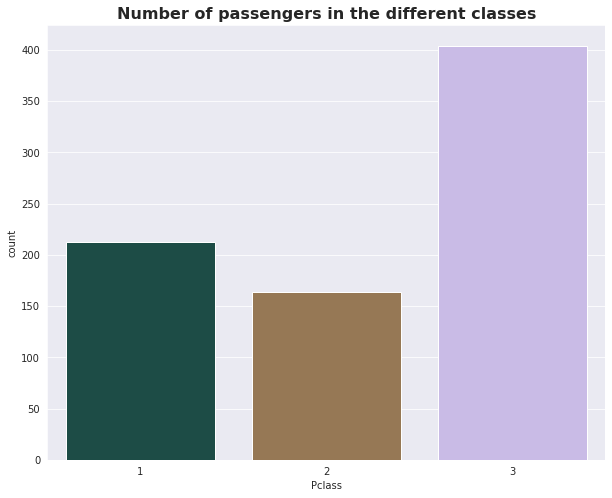

In [22]:
# plotting the number of passengers in the different classes
sns.countplot(x= train['Pclass'], palette='cubehelix')
plt.title("Number of passengers in the different classes")

- 3rd class had the largest number of passengers and 2nd class the least.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of number of spouses or siblings')

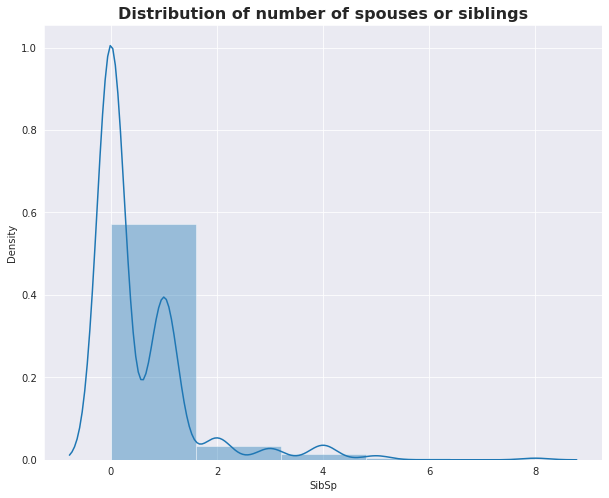

In [23]:
# plotting the distribution of the passengers' total number of spouses or siblings

sns.distplot(train['SibSp'], bins=5)
plt.title("Distribution of number of spouses or siblings")

- A majority of the passengers had 0 or 1 spouse or sibling only.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of number of parents and children')

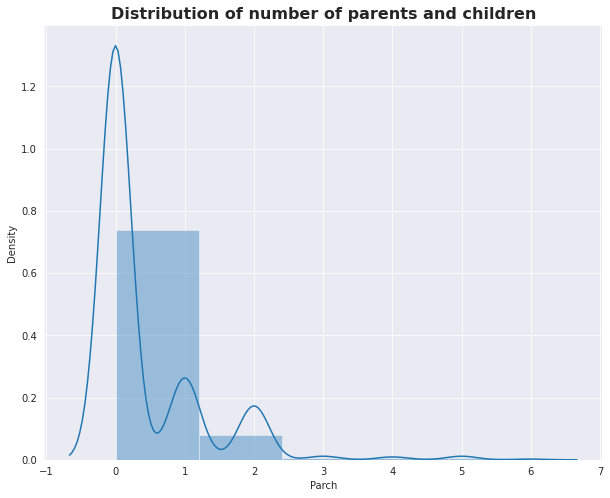

In [24]:
# plotting the ditribution of number of parents/children and individual is travelling with

sns.distplot(train['Parch'], bins=5)
plt.title("Distribution of number of parents and children")

- A majority of passengers had 0 or at least 1 parent or child.

### Bivariate analysis

Text(0.5, 1.0, 'Number of casualties and survivors per port.')

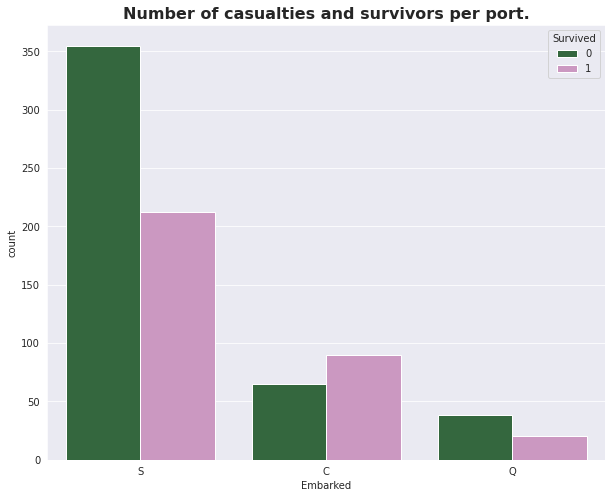

In [25]:
# plotting the number of survivors and casualties as per the ports they embarked from.

sns.countplot(x= train['Embarked'], hue= train['Survived'], palette='cubehelix')
plt.title("Number of casualties and survivors per port.")

- Cherboug is the only category that has more survivors than casualties.

Text(0.5, 1.0, 'Fare for passengers in the first, second and third class ')

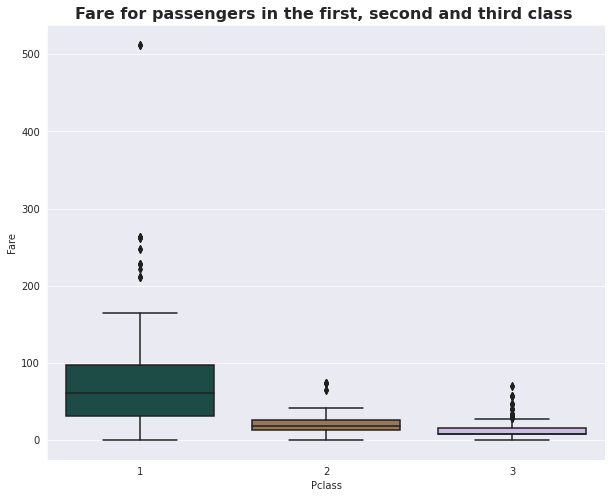

In [26]:
# plotting the fare distribution for the different classes
sns.boxplot(x= train['Pclass'], y= train['Fare'], palette='cubehelix')
plt.title("Fare for passengers in the first, second and third class ")

- As expected the prices are higher for first class tickets than all the others and 3rd class the least. 
- The 1st class column has a very conspicuous outlier.

Text(0.5, 1.0, "Comparison of casualties' and survivors' age distributions.")

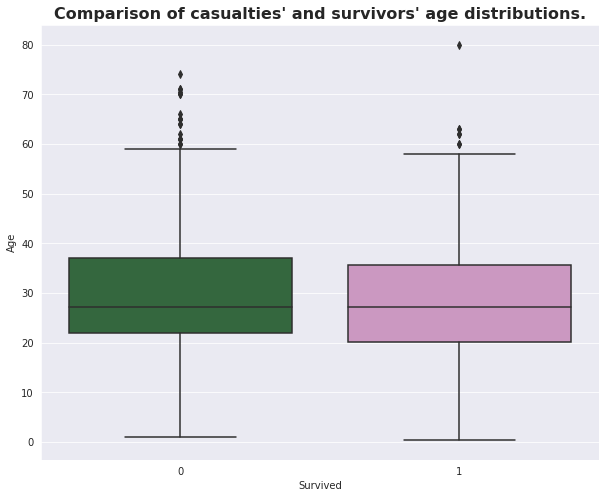

In [27]:
# plotting the age distributions of survivors and casualties

sns.boxplot(x= train['Survived'], y=train['Age'], palette='cubehelix')
plt.title("Comparison of casualties' and survivors' age distributions.")

- The age mean of the casualties is slightly higher than that of the survivors.

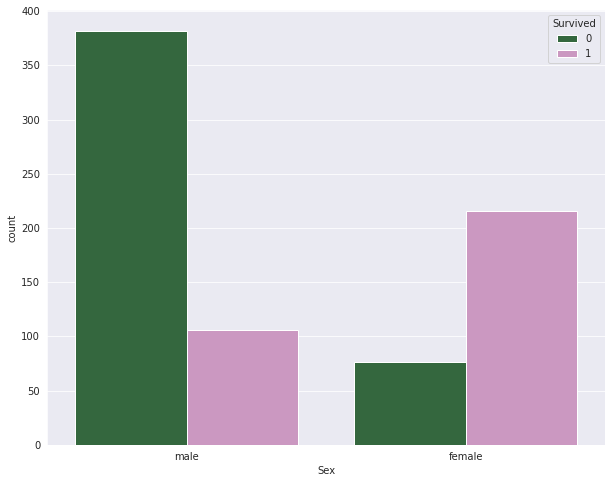

In [28]:
# plotting the number of male and female casualties and survivors

sns.countplot(x= train['Sex'], hue= train['Survived'], palette='cubehelix')

- A majority of the female population in the ship survived the shipwreck while a majority of the men did not.

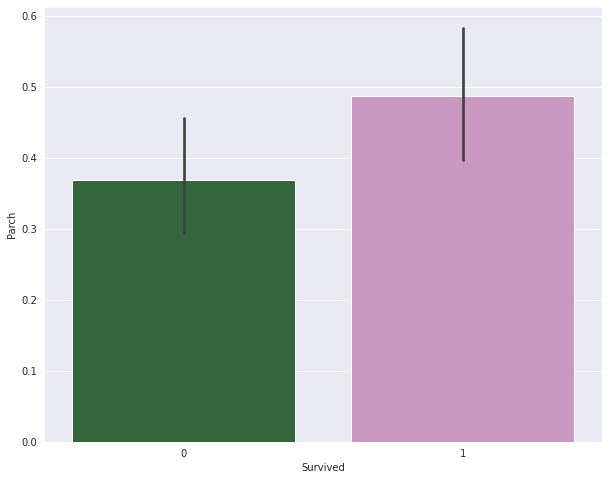

In [29]:
# plotting the mean number of parents or children for survivors and casualties

sns.barplot(x= train['Survived'], y= train['Parch'], palette='cubehelix')

- The average number of parents/children accompanying the individual on the trip was higher for survivors.

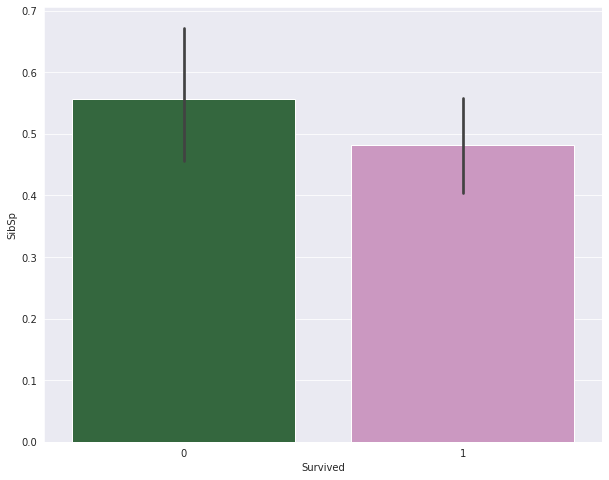

In [30]:
# plotting the number of siblings or spouses an individual had on the journey against whether
# they survived or not 

sns.barplot(x= train['Survived'], y= train['SibSp'], palette='cubehelix')

- The average number of spouses/siblings was higher for the casualties

### Multivariate analysis

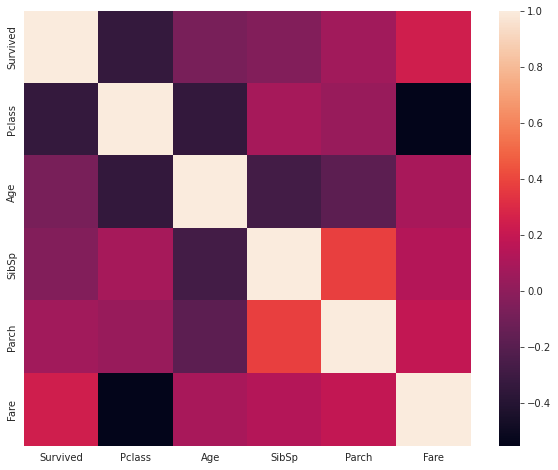

In [31]:
# plotting the variable correlations
sns.heatmap(train.corr())

Number of siblings/spouses and number of parents/children seem to be the only columns that are related to each other.

## K- Nearest Neighbours

#### Encoding my categorical data columns

- These columns include:

    1. Sex
    2. Embarked

In [32]:
def encode(data,col):

  df = pd.get_dummies(data[col], drop_first=True)
  return df

sex =encode(train,'Sex')

In [33]:
embarked =encode(train,'Embarked')

In [34]:
# conatenating the three dataframes, the dummy dataframes and the original then dropping the 
# embarked and sex columns.
Train = pd.concat([train, embarked, sex], axis=1)
Train.drop(['Embarked','Sex'], axis=1, inplace=True)

In [35]:
# previewing the encoded dataframe
Train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [36]:
Train.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Q             uint8
S             uint8
male          uint8
dtype: object

#### Standardizing my data

In [37]:
# calling my standard scaler method

sc = preprocessing.StandardScaler()

# splitting my data into training and test sets
y= Train['Survived'].values
X= Train.drop(['Survived'], axis=1).values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=98)

# fitting and transforming the x_train and transforming x_test

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Performing LDA to maximize the separability of the categories. Larger distances between data points of different categories ensures higher accuracy during n_neighbours classification

In [38]:
# Instatiating LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()

X_train = LDA.fit_transform(X_train, y_train)
X_test = LDA.transform(X_test)

#### Building my KNN model

In [39]:
# instatiating my knn classifier
knn = neighbors.KNeighborsClassifier()

# training the data
model = knn.fit(X_train, y_train)

# generating predicted values
pred = model.predict(X_test)

#computing the accuracy score
model.score(X_test, y_test)

0.6987179487179487

- The accuracy of the model is 69.87%

In [40]:
metrics.confusion_matrix(y_test, pred)

array([[63, 16],
       [31, 46]])

#### Optimizing my KNN model

In [41]:
# creating a dataframe with the parameter values to be plugged into the knn estimator
param_dict = {
    'n_neighbors': [1,3,5,7,9,11,13,14,15,17,19,21,23,25,27,29],
    'metric': ['minkowski', 'eucledian', 'manhattan']
}

# instatiate GridSearchCV

grid = model_selection.GridSearchCV(estimator= knn, param_grid=param_dict, n_jobs=-1, cv=10)

grid.fit(X_train, y_train)

# displaying the best parameters for my model.
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 13}

In [42]:
# instatiating the new model, training data using the model and computing
# the accuracy score

new_model =grid.best_estimator_

new_model =new_model.fit(X_train, y_train)


new_model.score(X_test, y_test)

0.7564102564102564

- The new score is better than the prior KNN model. I t acheived an accuracy of 75.64%.

In [43]:
# plotting a graph for accuracy of the model across the different n_neighbour values

train_scores= []
test_scores= []
neighbours = list(np.arange(1,30,1))

# creating a for loop that computes the accuracy of the model as the n_neighbours parameter value changes.
for k in neighbours:

  KNN = neighbors.KNeighborsClassifier(n_neighbors=k)
  KNN = KNN.fit(X_train, y_train)

  acc_train = KNN.score(X_train, y_train)
  acc_test = KNN.score(X_test, y_test)

  train_scores.append(acc_train)
  test_scores.append(acc_test)

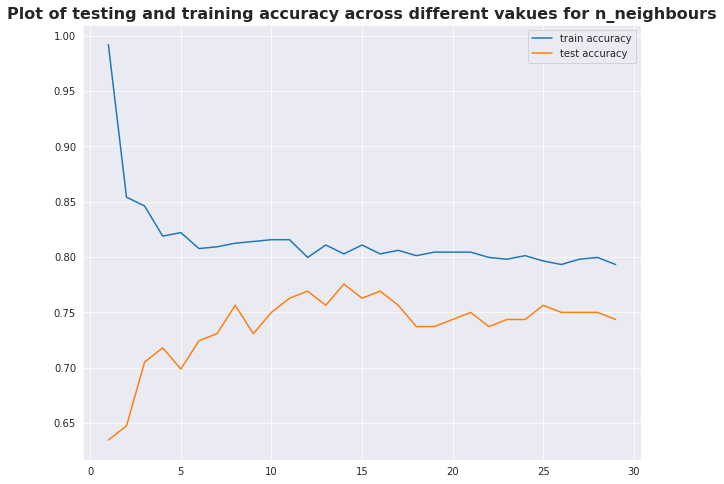

In [44]:
plt.plot(neighbours,train_scores, label='train accuracy')
plt.plot(neighbours,test_scores, label='test accuracy')
plt.title("Plot of testing and training accuracy across different vakues for n_neighbours")
plt.legend()
plt.show()

- The tesing accuracy appear to peak about 13 or 14 n_neighbours.

In [45]:
# changing the size of the splits to observe changes in the performance of the model if any.

bx_train, bx_test, by_train, by_test = model_selection.train_test_split(X,y, test_size=.3, random_state=98)

split_ano =grid.best_estimator_.fit(bx_train, by_train)
split_ano.score(bx_test, by_test)

0.6709401709401709

- The accuracy is lower using the 70:30 split.

In [47]:
new_pred= split_ano.predict(bx_test)
metrics.confusion_matrix(by_test, new_pred)

array([[108,  23],
       [ 54,  49]])

In [48]:
ax_train, ax_test, ay_train, ay_test = model_selection.train_test_split(X,y, test_size=.4, random_state=98)

split_ano =grid.best_estimator_.fit(ax_train, ay_train)
print(split_ano.score(ax_test, ay_test))


newer_pred= split_ano.predict(ax_test)
metrics.confusion_matrix(ay_test, newer_pred)

0.6442307692307693


array([[142,  31],
       [ 80,  59]])

- The accuracy is even lower using the 60:40 split than the 70:30 split.



Predicting the categories in the test dataframe:

In [49]:
# encoding the columns in test

tst_sex =encode(test, 'Sex')
tst_loc =encode(test, 'Embarked')

Test = pd.concat([test, tst_sex,tst_loc], axis=1)
Test.drop(['Embarked','Sex'], axis=1,inplace=True)
Test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.500000,0,0,7.8292,1,1,0
1,3,47.000000,1,0,7.0000,0,0,1
2,2,62.000000,0,0,9.6875,1,1,0
3,3,27.000000,0,0,8.6625,1,0,1
4,3,22.000000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,27.090863,0,0,8.0500,1,0,1
414,1,39.000000,0,0,108.9000,0,0,0
415,3,38.500000,0,0,7.2500,1,0,1
416,3,27.090863,0,0,8.0500,1,0,1


In [50]:
# dropping duplicates
Test.drop_duplicates(inplace=True)

In [51]:
# dropping null values
Test.dropna(inplace=True)

In [52]:
# standardizing our data and perfroming LDA
std_test = sc.transform(Test)
test = LDA.transform(Test)

In [58]:
predicted_values =new_model.predict(Test)
predicted_values =pd.DataFrame(predicted_values)
predicted_values.value_counts()

0    266
1    113
dtype: int64

- The records in the test dataframe have 266 of them being classified as casualties and 113 being classified as survivors.